# XGBoost Basis

In [9]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import classification_report

In [ ]:
# 📥 1. Daten einlesen
train = pd.read_csv("Data/preprocessed/train_preprocessed.csv")         # Trainingsdaten mit Zielspalte
test = pd.read_csv("Data/preprocessed/test_preprocessed.csv")        # Testdaten ohne Zielspalte
target = pd.read_csv("Data/preprocessed/test_target.csv")  # Testzielwerte mit AdoptionSpeed + PetID

# 🧹 2. Features & Ziel trennen
X_train = train.drop(columns=["AdoptionSpeed", "PetID"])
y_train = train["AdoptionSpeed"]

X_test = test.drop(columns=["PetID"])
y_test = target["AdoptionSpeed"]  # Zielwerte für Test (optional)

# 🧠 3. XGBoost-Modell mit Defaultparametern + reproduzierbarem Seed
model = xgb.XGBClassifier(
    objective="multi:softprob",
    num_class=5,
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)

# 🚀 4. Training
model.fit(X_train, y_train)

# 🔍 5. Vorhersage auf Testdaten
y_pred = model.predict(X_test)

# 📊 6. Evaluation (falls Zielwerte vorhanden)
print(classification_report(y_test, y_pred))

# 🧾 7. Ergebnis zusammenführen (optional)
result_df = pd.DataFrame({
    "PetID": test["PetID"],
    "AdoptionSpeed_Pred": y_pred,
    "AdoptionSpeed_True": y_test.values
})

# 💾 8. Optional: Submission speichern
submission = pd.DataFrame({
    "PetID": test["PetID"],
    "AdoptionSpeed": y_pred
})


/Users/basti/miniforge3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [11:59:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

           0       0.52      0.51      0.51       684
           1       0.32      0.30      0.31       448
           2       0.33      0.33      0.33       628
           3       0.34      0.25      0.29       464
           4       0.46      0.57      0.51       621

    accuracy                           0.41      2845
   macro avg       0.39      0.39      0.39      2845
weighted avg       0.40      0.41      0.40      2845



In [11]:
print(y_test.value_counts())


AdoptionSpeed
0    684
2    628
4    621
3    464
1    448
Name: count, dtype: int64


In [12]:
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PetID          2845 non-null   object
 1   AdoptionSpeed  2845 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 44.6+ KB


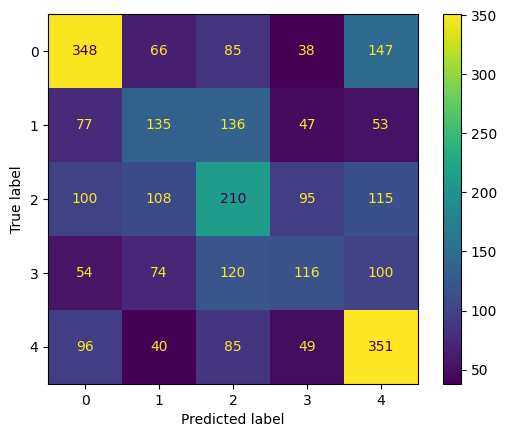

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd

# Confusion Matrix berechnen
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4])

# Anzeige
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
disp.plot()
#

In [14]:
print(y_train.value_counts())


AdoptionSpeed
0    3074
4    2952
2    2776
3    2287
1    2186
Name: count, dtype: int64


In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [3, 5, 7, 9]
}

grid = GridSearchCV(
    xgb.XGBClassifier(random_state=42),
    param_grid,
    scoring="accuracy",
    cv=3
)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 9}
